In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go


plt.style.use('fivethirtyeight')
%matplotlib inline

In [12]:
import yfinance as yf
import datetime as dt

stock = "POWERGRID.NS"
start = dt.datetime(2000, 1, 1)
end = dt.datetime(2024, 12, 31)

df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [13]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2007-10-05,32.764324,35.662958,27.081049,29.246882,855215656
2007-10-08,31.087030,33.871672,30.891616,33.871672,126671715
2007-10-09,33.204006,33.497125,29.426012,31.103310,116725709
2007-10-10,33.513409,34.197356,33.220289,34.067080,67931378
2007-10-11,37.258827,39.082686,33.220285,39.082686,106320954


In [14]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
Date,,,,,
2024-12-23,315.299988,318.299988,311.549988,318.000000,5984169
2024-12-24,310.100006,316.649994,308.750000,314.100006,4833589
2024-12-26,310.299988,313.100006,308.750000,310.100006,3775101
2024-12-27,309.399994,312.299988,308.799988,310.750000,3981693
2024-12-30,307.549988,312.000000,306.299988,309.000000,12489142


In [15]:
df.shape

(4247, 5)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4247 entries, 2007-10-05 to 2024-12-30
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Close, POWERGRID.NS)   4247 non-null   float64
 1   (High, POWERGRID.NS)    4247 non-null   float64
 2   (Low, POWERGRID.NS)     4247 non-null   float64
 3   (Open, POWERGRID.NS)    4247 non-null   float64
 4   (Volume, POWERGRID.NS)  4247 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 199.1 KB


In [88]:
df.isnull().sum()

Price   Ticker      
Close   POWERGRID.NS    0
High    POWERGRID.NS    0
Low     POWERGRID.NS    0
Open    POWERGRID.NS    0
Volume  POWERGRID.NS    0
dtype: int64

In [89]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
count,4247.000000,4247.000000,4247.000000,4247.000000,4.247000e+03
mean,82.408938,83.476517,81.353336,82.446711,1.190427e+07
std,68.122021,68.914541,67.280223,68.105998,2.053537e+07
min,19.129538,20.448816,17.150620,20.349869,0.000000e+00
25%,36.824953,37.390746,36.268679,36.892383,4.816048e+06
50%,57.040413,57.661998,56.246395,56.911171,8.393334e+06
75%,84.361324,85.614123,83.460890,84.450913,1.369369e+07
max,360.278564,361.067223,352.145309,358.898352,8.552157e+08


In [90]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.764332,35.662966,27.081055,29.246889,855215656
1,2007-10-08,31.087025,33.871666,30.891610,33.871666,126671715
2,2007-10-09,33.203999,33.497118,29.426006,31.103303,116725709
3,2007-10-10,33.513412,34.197360,33.220293,34.067083,67931378
4,2007-10-11,37.258831,39.082690,33.220288,39.082690,106320954


In [91]:
df.columns

MultiIndex([(  'Date',             ''),
            ( 'Close', 'POWERGRID.NS'),
            (  'High', 'POWERGRID.NS'),
            (   'Low', 'POWERGRID.NS'),
            (  'Open', 'POWERGRID.NS'),
            ('Volume', 'POWERGRID.NS')],
           names=['Price', 'Ticker'])

In [92]:
# df.to_csv("powergrid.csv")
# data01 = pd.read_csv("powergrid.csv")

In [93]:
df = pd.DataFrame(df)
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
0,2007-10-05,32.764332,35.662966,27.081055,29.246889,855215656
1,2007-10-08,31.087025,33.871666,30.891610,33.871666,126671715
2,2007-10-09,33.203999,33.497118,29.426006,31.103303,116725709
3,2007-10-10,33.513412,34.197360,33.220293,34.067083,67931378
4,2007-10-11,37.258831,39.082690,33.220288,39.082690,106320954


In [94]:
df.iloc[0, 0:]


Price   Ticker      
Date                    2007-10-05 00:00:00
Close   POWERGRID.NS              32.764332
High    POWERGRID.NS              35.662966
Low     POWERGRID.NS              27.081055
Open    POWERGRID.NS              29.246889
Volume  POWERGRID.NS              855215656
Name: 0, dtype: object

In [95]:
df['Date'] = pd.to_datetime(df['Date']).dt.date  # Ensure 'Date' is a datetime object
df.columns = df.columns.droplevel('Ticker')  # Drop 'Ticker' level

In [96]:
df.head()

Price,Date,Close,High,Low,Open,Volume
0,2007-10-05,32.764332,35.662966,27.081055,29.246889,855215656
1,2007-10-08,31.087025,33.871666,30.891610,33.871666,126671715
2,2007-10-09,33.203999,33.497118,29.426006,31.103303,116725709
3,2007-10-10,33.513412,34.197360,33.220293,34.067083,67931378
4,2007-10-11,37.258831,39.082690,33.220288,39.082690,106320954


In [97]:
# Candlesticks 

# Plotting candlestick chart
fig = go.Figure(data=[go.Candlestick(x=np.array(df['Date']), 
                                     open=df['Open'], 
                                     high=df['High'], 
                                     low=df['Low'], 
                                     close=df['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [98]:
# df = df.drop(['Date'], axis = 1)
# df.head()

In [99]:
def plot_graph(x, label, title):
    plt.figure(figsize=(8, 4))
    plt.plot(x, label = label, linewidth = 1)
    plt.title(title)
    plt.legend()
    plt.show()

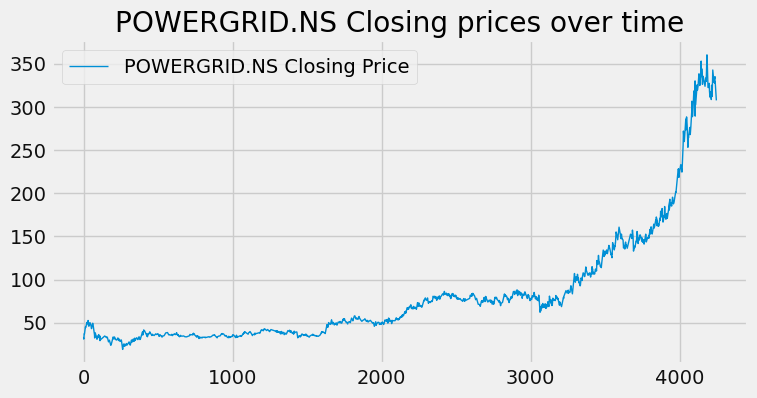

In [100]:
plot_graph(x=df['Close'] , label=f'{stock} Closing Price' ,  title=f'{stock} Closing prices over time')

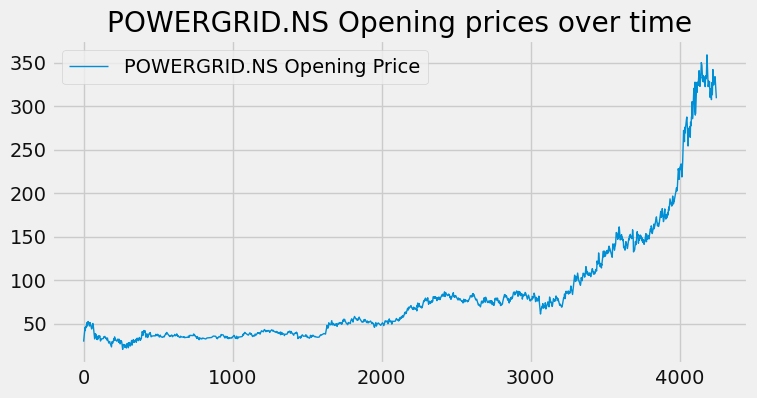

In [101]:
plot_graph(x=df['Open'] , label=f'{stock} Opening Price' ,  title=f'{stock} Opening prices over time')

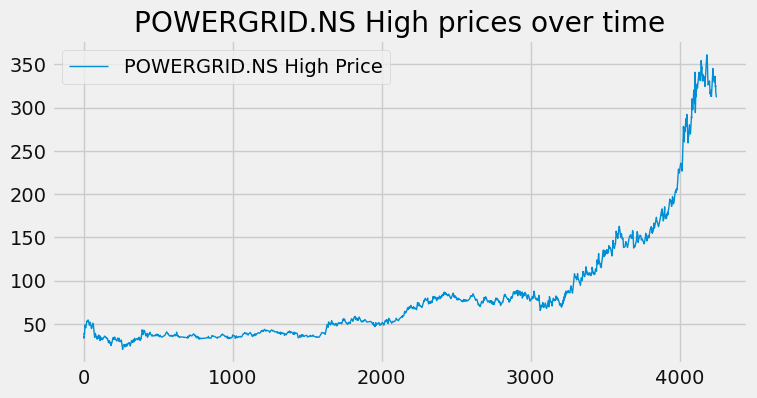

In [102]:
plot_graph(x=df['High'] , label=f'{stock} High Price' ,  title=f'{stock} High prices over time')

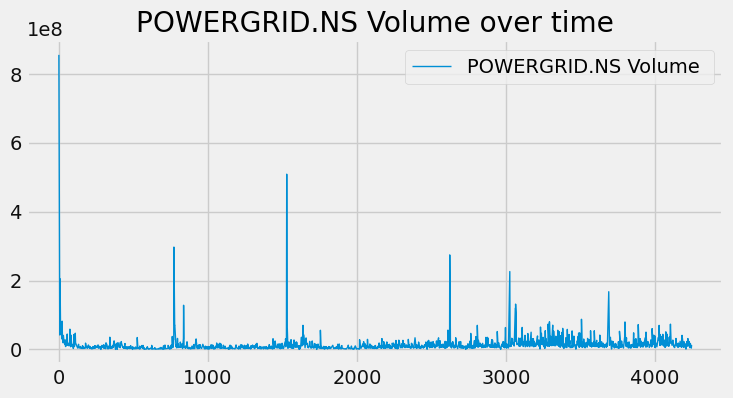

In [103]:
plot_graph(x=df['Volume'] , label=f'{stock} Volume ' ,  title=f'{stock} Volume over time')

In [104]:
rm100 = df.Close.rolling(100).mean()

In [105]:
rm100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
4242    328.790771
4243    328.487350
4244    328.059803
4245    327.651122
4246    327.374998
Name: Close, Length: 4247, dtype: float64

In [106]:
rm200 = df.Close.rolling(200).mean()

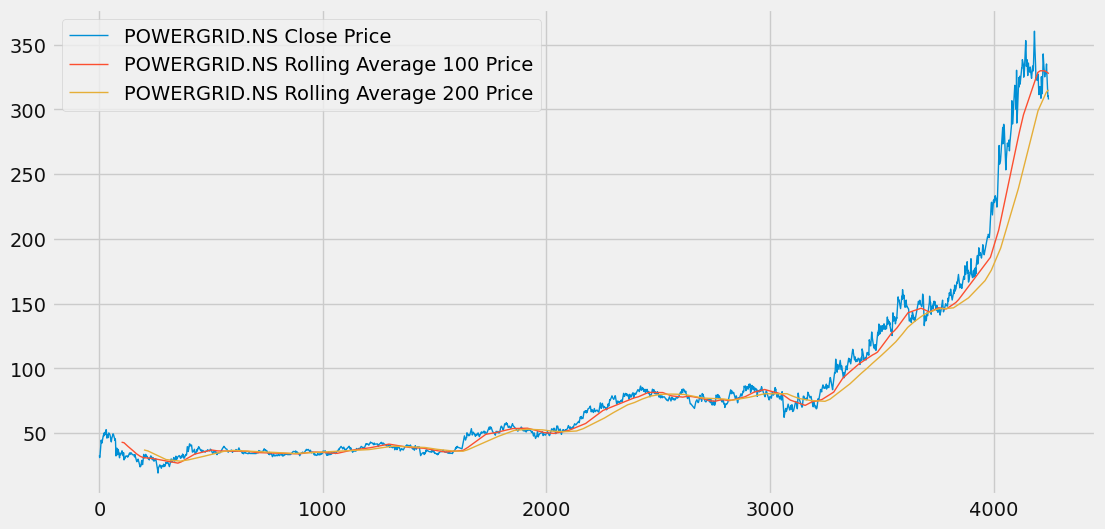

In [107]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(rm100, label = f'{stock} Rolling Average 100 Price', linewidth = 1)
plt.plot(rm200, label = f'{stock} Rolling Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [108]:
ema100 = df['Close'].ewm(span=100, adjust = False).mean()

In [109]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

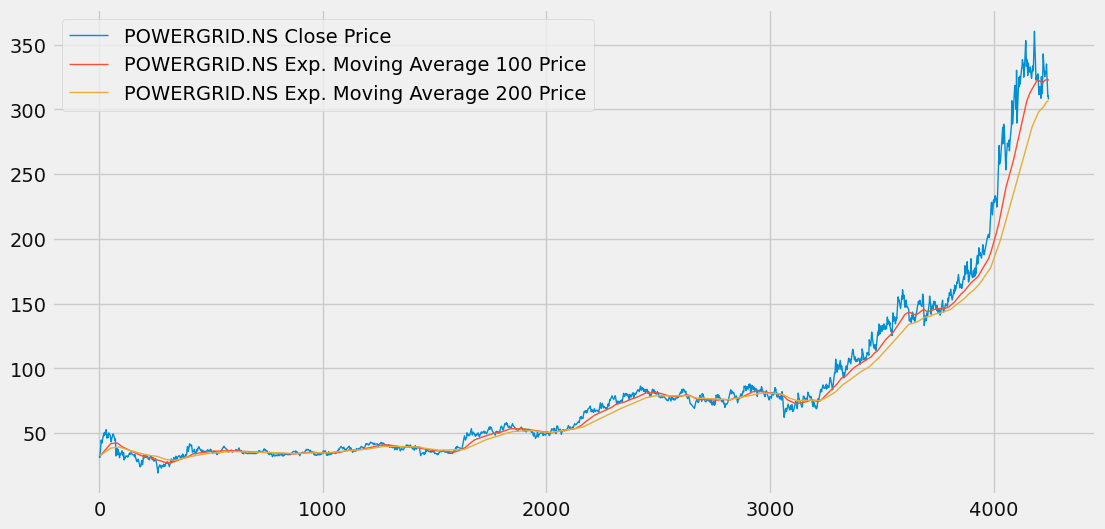

In [110]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [111]:
# Training & Testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [112]:
data_training.shape

(2972, 1)

In [113]:
data_testing.shape

(1275, 1)

In [114]:
data_training[:5]

,Close
0,32.764332
1,31.087025
2,33.203999
3,33.513412
4,37.258831


In [115]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))
data_training_scale = scaler.fit_transform(data_training)
data_training_scale

array([[0.19808621],
       [0.1737183 ],
       [0.20447368],
       ...,
       [0.91439177],
       [0.89898205],
       [0.90290999]])

In [116]:
x_train = []
y_train = []

for i in range(100, data_training_scale.shape[0]):
    x_train.append(data_training_scale[i-100:i])
    y_train.append(data_training_scale[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [117]:
x_train

array([[[0.19808621],
        [0.1737183 ],
        [0.20447368],
        ...,
        [0.20092504],
        [0.20494697],
        [0.20683967]],

       [[0.1737183 ],
        [0.20447368],
        [0.20896885],
        ...,
        [0.20494697],
        [0.20683967],
        [0.23522923]],

       [[0.20447368],
        [0.20896885],
        [0.26338226],
        ...,
        [0.20683967],
        [0.23522923],
        [0.24966057]],

       ...,

       [[0.87429847],
        [0.88922737],
        [0.86713279],
        ...,
        [0.93705341],
        [0.93040591],
        [0.92073691]],

       [[0.88922737],
        [0.86713279],
        [0.88236018],
        ...,
        [0.93040591],
        [0.92073691],
        [0.91439177]],

       [[0.86713279],
        [0.88236018],
        [0.87847868],
        ...,
        [0.92073691],
        [0.91439177],
        [0.89898205]]])

In [118]:
x_train.shape

(2872, 100, 1)

In [119]:
y_train.shape

(2872,)

In [125]:
# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import plot_model

LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [131]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [132]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [133]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [71]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
89/89 [==============================] - 39s 386ms/step - loss: 0.0336
Epoch 2/50
89/89 [==============================] - 31s 350ms/step - loss: 0.0090
Epoch 3/50
89/89 [==============================] - 23s 260ms/step - loss: 0.0080
Epoch 4/50
89/89 [==============================] - 24s 269ms/step - loss: 0.0070
Epoch 5/50
89/89 [==============================] - 24s 268ms/step - loss: 0.0064
Epoch 6/50
89/89 [==============================] - 24s 267ms/step - loss: 0.0061
Epoch 7/50
89/89 [==============================] - 24s 271ms/step - loss: 0.0058
Epoch 8/50
89/89 [==============================] - 24s 271ms/step - loss: 0.0050
Epoch 9/50
89/89 [==============================] - 24s 272ms/step - loss: 0.0050
Epoch 10/50
89/89 [==============================] - 24s 273ms/step - loss: 0.0050
Epoch 11/50
89/89 [==============================] - 24s 270ms/step - loss: 0.0045
Epoch 12/50
89/89 [==============================] - 24s 269ms/step - loss: 0.0047
Epoch 13/50
8

In [121]:
past_100_days = data_training.tail(100)

In [123]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [124]:
final_df.head()

,Close
0,80.258911
1,79.990417
2,78.957764
3,80.073044
4,80.382843


In [125]:
input_data = scaler.fit_transform(final_df)

In [126]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [127]:
x_test.shape

(1275, 100, 1)

In [ ]:
y_predicted = model.predict(x_test)

In [79]:
y_predicted.shape

(1263, 1)

In [80]:
scaler.scale_

array([0.0035166])

In [86]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

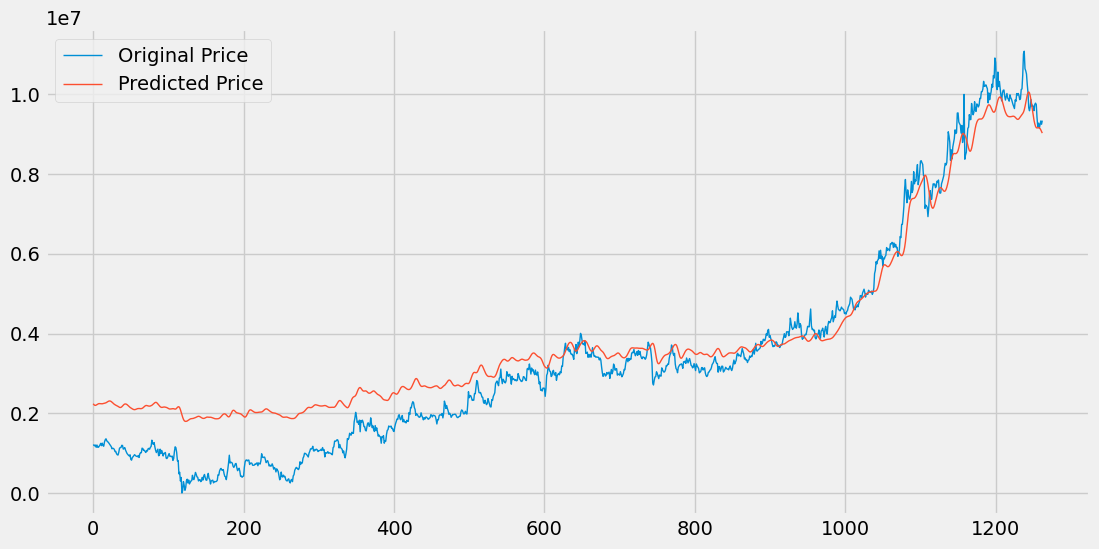

In [89]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [88]:
model.save(f'{stock}.h5')

In [63]:
import yfinance as yf
import mplfinance as mpf
import pandas as pd

def plot_intraday_candlestick(stock, interval='1m', period='1d'):

    # Fetch intraday stock data
    print(f"Fetching {interval} interval data for {stock}...")
    data = yf.download(tickers=stock, period=period, interval=interval)

    if data.empty:
        print(f"No data available for {stock} with the specified period and interval.")
        # return

    data.dropna(inplace=True)

    data.columns = [ 'Close', 'High' , 'Low', 'Open' , 'Volume'] 

    # Convert 'Date' to datetime
    data.index = pd.to_datetime(data.index)

    # Convert the index directly to IST (Indian Standard Time)
    if data.index.tzinfo is None:  # If the index is not timezone-aware
        data.index = data.index.tz_localize('UTC').tz_convert('Asia/Kolkata')
    else:  # If the index is already timezone-aware
        data.index = data.index.tz_convert('Asia/Kolkata')


    # Plot candlestick chart
    mpf.plot(data, type='candle', volume=False, title=f"Intraday Candlestick Chart for {stock}", style='yahoo')
    print(f"Successfully plotted candlestick chart for {stock}.")

    # Example usage
stock = "POWERGRID.NS"  # Replace with your stock ticker
interval = "1m"         # Supported intervals: '1m', '2m', '5m', '15m', '30m', '1h'
period = "1d"           # Supported periods: '1d', '5d', etc.

plot_intraday_candlestick(stock=stock, interval=interval, period=period)

In [ ]:
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt

# Example data for candlestick chart
data = {
    'Date': ['2025-01-08 09:00:00', '2025-01-08 09:05:00', '2025-01-08 09:10:00', 
             '2025-01-08 09:15:00', '2025-01-08 09:20:00'],
    'Open': [100.0, 103.0, 104.0, 105.0, 107.0],
    'High': [105.0, 107.0, 106.0, 108.0, 109.0],
    'Low': [99.0, 102.0, 103.5, 104.0, 106.5],
    'Close': [103.0, 104.0, 105.0, 107.0, 108.0],
    'Volume': [1000, 1200, 1100, 1300, 1400]
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Plot the candlestick chart
fig, axes = mpf.plot(df, type='candle', volume=True, title="Simple Candlestick Chart", style='yahoo', returnfig=True)

# Adding custom axis labels
axes[0].set_xlabel("Time")  # X-axis label
axes[0].set_ylabel("Price")  # Y-axis label


# Display the plot
plt.show()


In [17]:
import yfinance as yf
import pandas as pd
def fetch_watchlist_details(watchlist):
    data = {}
    for stock in watchlist:
        try:
            ticker = yf.Ticker(stock)
            stock_info = ticker.history(period="5d")  # Fetch 2 days of data
            
            if not stock_info.empty and len(stock_info) >= 2:
                # Get the latest and previous day's data
                latest_data = stock_info.iloc[-1]
                previous_data = stock_info.iloc[-2]
                
                # Calculate percent change from previous close
                percent_change = ((latest_data["Close"] - previous_data["Close"]) / previous_data["Close"]) * 100
                
                # Calculate absolute change
                absolute_change = latest_data["Close"] - previous_data["Close"]
                
                # Store stock data in the dictionary
                data[stock] = {
                    "SYMBOL": stock,
                    "CLOSE_PRICE": latest_data["Close"],
                    "HIGH": latest_data["High"],
                    "LOW": latest_data["Low"],
                    "VOLUME": latest_data["Volume"],
                    "PERCENT_CHANGE": percent_change,
                    "ABSOLUTE_CHANGE": absolute_change
                }
            else:
                # If no data or insufficient data, set values to None
                data[stock] = {key: None for key in ["SYMBOL", "CLOSE_PRICE", "HIGH", "LOW", "VOLUME", "PERCENT_CHANGE", "ABSOLUTE_CHANGE"]}
                data[stock]["SYMBOL"] = stock
        except Exception:
            # On error, set all fields to None
            data[stock] = {key: None for key in ["SYMBOL", "CLOSE_PRICE", "HIGH", "LOW", "VOLUME", "PERCENT_CHANGE", "ABSOLUTE_CHANGE"]}
            data[stock]["SYMBOL"] = stock
            
    # Convert the dictionary to a DataFrame
    return  data

# List of stock symbols to fetch data for
watchlist = ["AAPL", "TSLA", "GOOGL", "AMZN"]

# Call the function to fetch the watchlist details
stock_details_df = fetch_watchlist_details(watchlist)

# Print the resulting DataFrame
print(stock_details_df)

In [16]:
ticker = yf.Ticker('POWERGRID.NS')
stock_info = ticker.history(period="1d")  # Fetch 2 days of data
stock_info

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-01-09 00:00:00+05:30,306.649994,306.899994,303.649994,304.5,3807823,0.0,0.0


In [47]:
from keras.models import load_model

import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.graph_objs as go
import plotly.express as px

plt.style.use("fivethirtyeight")

# Load the model (make sure your model is in the correct path)
current_directory = os.getcwd()
model_path = os.path.join(current_directory, 'stock_dl_model.h5')
model = load_model(model_path)
stock='POWERGRID.NS'



df=yf.download(stock, interval="1d", period="max")

df.columns = df.columns.droplevel('Ticker')  


# Data splitting
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

# Prepare data for prediction
past_100_days = data_training.tail(100)

final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

scaler = MinMaxScaler(feature_range=(0, 1))
input_data = scaler.fit_transform(final_df)

x_test, y_test = [], []
l=input_data.shape[0]
for i in range(100, l ):
    x_test.append(input_data[i - 100:i])
    y_test.append(input_data[i, 0])

if l >= 100:
    x_test.append(input_data[l - 100:l])


x_test, y_test = np.array(x_test), np.array(y_test)

y_predicted = model.predict(x_test)
y_predicted=y_predicted.reshape(-1)

# Reverse scaling for all features
X_min = scaler.data_min_
X_max = scaler.data_max_

y_predicted = y_predicted *  (X_max - X_min) + X_min
y_test = y_test *  (X_max - X_min) + X_min


fig = go.Figure()

testing_dates = df.index[int(len(df)*0.70):]
# testing_dates = pd.to_datetime(testing_dates)

fig.add_trace(go.Scatter(x=testing_dates, y=y_test, mode='lines', name='Original Price', line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=testing_dates, y=y_predicted, mode='lines', name='Predicted Price', line=dict(color='red', width=2)))

fig.update_layout(
    title="Prediction vs Original Trend",
    xaxis_title="Date",
    yaxis_title="Price",
    legend_title="Legend",
    xaxis_rangeslider_visible=True,  
    width=800,  
    height=600,

)

# fig.write_html("prediction_vs_original_trend.html")

# <h1>Stock Price Prediction vs Original Trend</h1>
    
#     <!-- Embed the Plotly HTML graph -->
#     <iframe src="{{ url_for('static', filename='prediction_vs_original_trend.html') }}" width="100%" height="600px"></iframe>


fig.show()


[*********************100%***********************]  1 of 1 completed


40/40 [==============================] - 5s 115ms/step


In [46]:
#Next day Prediction
next__day_x=input_data[-100:]
next__day_x = np.expand_dims(next__day_x, axis=0)  # Add a dimension at axis 0

next__day_pred = model.predict(next__day_x)

next__day_pred= next__day_pred *  (X_max - X_min) + X_min

print(next__day_pred)
print(next__day_pred[0,0])

1/1 [==============================] - 0s 204ms/step
[[299.61093399]]
299.6109339920222


In [19]:
import plotly.graph_objs as go

# Create a Plotly figure
fig1 = go.Figure()
    # Exponential Moving Averages
ema20 =   df.Close.ewm(span=20, adjust=False).mean()
ema50  =  df.Close.ewm(span=50, adjust=False).mean()  
ema100 =  df.Close.ewm(span=100, adjust=False).mean()  
ema200 =   df.Close.ewm(span=200, adjust=False).mean() 

fig1.add_trace(go.Scatter(x=df.index, y=df['Close']  , mode='lines', name='Closing Price', line=dict(color='yellow', width=2)))
fig1.add_trace(go.Scatter(x=df.index, y=ema20, mode='lines', name='EMA 20', line=dict(color='green', width=2)))
fig1.add_trace(go.Scatter(x=df.index, y=ema50, mode='lines', name='EMA 50', line=dict(color='red', width=2)))

# Update Layout with title, axis labels, and size
fig1.update_layout(
    title="Closing Price vs Time (20 & 50 Days EMA)",
    xaxis_title="Time",
    yaxis_title="Price",
    legend_title="Legend",
    width=800, 
    height=600, 
)

fig.write_html("./static/ema_20_50_chart.html")

# Save the figure as a PNG image (requires Kaleido package)
# fig1.write_image(f"static/{stock}_ema_20_50.png")

# Display the plot interactively (optional)
fig1.show()


In [125]:
import plotly.graph_objs as go

fig = go.Figure()

fig.add_trace(go.Bar(x=df.index, y=df['Volume'], name=f'{stock} Volume', marker=dict(color='rgba(0, 0, 139, 0.8)')   ))

fig.update_layout(
    title=f'{stock} Volume Over Time',
    xaxis_title='Date',
    yaxis_title='Volume',
    width=800,
    height=600,
    xaxis_rangeslider_visible=True
)


# fig.write_html("prediction_vs_original_trend.html")
fig.show()


In [ ]:
df = df.reset_index()

df = pd.DataFrame(df)
df['Date'] = pd.to_datetime(df['Date']).dt.date 
df.columns = df.columns.droplevel('Ticker')  



In [115]:
fig = go.Figure(data=[go.Candlestick(x=df.index,
                                     open=df['Open'], 
                                     high=df['High'], 
                                     low=df['Low'], 
                                     close=df['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [ ]:
# Create the bar chart with plotly.express
fig = px.bar(
    df,
    x=df.index,  # Dates on the x-axis
    y='Volume',  # Volume on the y-axis
    title=f'{stock} Volume Over Time',
    labels={'x': 'Date', 'Volume': 'Volume'},  # Custom axis labels
    color_discrete_sequence=['rgba(0, 0, 139, 1)']  # Custom bar color
)

# Update layout for fixed size and range slider
fig.update_layout(
    width=800,
    height=600,
    xaxis_rangeslider_visible=True  # Adds range slider
)

# Show the interactive chart
fig.show()

In [9]:
def convert_to_indian_time(datetime_index):
    # Check if datetime is already timezone-aware
    if datetime_index.tz is not None:
        # If the datetime is timezone-aware, convert to Asia/Kolkata and then remove the timezone
        return datetime_index.tz_convert('Asia/Kolkata').tz_localize(None)
    else:
        # If the datetime is timezone-naive, localize it to UTC first, convert to IST, and then remove timezone
        return datetime_index

In [ ]:
import yfinance as yf

# Example parameters
stock = "AAPL"        # Example: "AAPL", "GOOGL", "POWERGRID.NS"
interval = "1d"       # Example: "1m", "2m", "5m", "15m", "30m", "1h", "1d", "5d", "1wk", "1mo", "3mo"
period = "1mo"        # Example: "1d", "5d", "1wk", "1mo", "3mo", "6mo", "1y", "2y", "5y", "10y", "ytd", "max"

# Fetch data using yfinance
data = yf.download(stock, interval=interval, period=period)

# Display the data
print(data)


In [ ]:
import plotly.graph_objects as go
import yfinance as yf
import pandas as pd
import numpy as np


# Fetch data using yfinance
stock = "POWERGRID.NS"

# Create subsets for different time ranges
ranges = {
    "1d": yf.download(stock, interval="1m", period="1d"),
    "5d": yf.download(stock, interval="15m", period="5d"),
    "1mon": yf.download(stock, interval="30m", period="1mo"),
    "1year": yf.download(stock, interval="1d", period="1y"),
    "All": yf.download(stock, interval="1d", period="max"),
}

# Convert the datetime indices to IST (Indian Standard Time)
ranges['1d'].index = convert_to_indian_time(ranges['1d'].index)

# Initialize figure
fig = go.Figure()

# Add line trace for the default 'All' range (closing price)
fig.add_trace(go.Scatter(x=ranges['All'].index.tolist(),
                         y=np.array(ranges['All']['Close']).reshape(-1).tolist(),
                         mode="lines",
                         name="All"))

# Add dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            active=4,
            buttons=[
                dict(label="1d",
                     method="restyle",
                     args=[{
                         "x": [ranges['1d'].index.tolist()],
                         "y": [np.array(ranges['1d']['Close']).reshape(-1).tolist()],
                         "mode": ["lines"]
                     }]),
                dict(label="5d",
                     method="restyle",
                     args=[{
                         "x": [ranges['5d'].index.tolist()],
                         "y":[ np.array(ranges['5d']['Close']).reshape(-1).tolist()],
                         "mode": ["lines"]
                     }]),
                dict(label="1mon",
                     method="restyle",
                     args=[{
                         "x": [ranges['1mon'].index.tolist()],
                         "y": [np.array(ranges['1mon']['Close']).reshape(-1).tolist()],
                         "mode": ["lines"]
                     }]),
                dict(label="1year",
                     method="restyle",
                     args=[{
                         "x": [ranges['1year'].index.tolist()],
                         "y":[ np.array(ranges['1year']['Close']).reshape(-1).tolist()],
                         "mode": ["lines"]
                     }]),
                dict(label="All",
                     method="restyle",
                     args=[{
                         "x": [ranges['All'].index.tolist()],
                         "y": [np.array(ranges['All']['Close']).reshape(-1).tolist()],
                         "mode": ["lines"]
                     }]),
            ]
        )
    ]
)

# Set title
fig.update_layout(title="Interactive Line Graph", xaxis_rangeslider_visible=False)

fig.show()

In [2]:
ranges['1d'].Close.iloc[-1].values[0]

299.70001220703125

In [ ]:
import plotly.graph_objects as go
import yfinance as yf
import numpy as np
import pytz


# Fetch data using yfinance
stock = "INFY.NS"

# Create subsets for different time ranges
ranges = {
    "1d": yf.download(stock, interval="1m", period="1d"),
    "5d": yf.download(stock, interval="15m", period="5d"),
    "1mon": yf.download(stock, interval="30m", period="1mo"),
    "1year": yf.download(stock, interval="1d", period="1y"),
    "All": yf.download(stock, interval="1d", period="max"),
}

# # Convert time indices to Indian Standard Time (IST)
ranges['1d'].index = convert_to_indian_time(ranges['1d'].index)


# Initialize figure
fig = go.Figure()

# Add candlestick trace for the default 'All' range
fig.add_trace(go.Candlestick(
    x=ranges['All'].index.tolist(),
    open=np.array(ranges['All']['Open']).reshape(-1).tolist(),
    high=np.array(ranges['All']['High']).reshape(-1).tolist(),
    low=np.array(ranges['All']['Low']).reshape(-1).tolist(),
    close=np.array(ranges['All']['Close']).reshape(-1).tolist(),
    name="All"
))

# Add dropdown menu
fig.update_layout(
    updatemenus=[dict(
        active=4,  # Set default to "All"
        buttons=[
            dict(
                label="1d",
                method="restyle",
                args=[{
                    "x": [ranges['1d'].index.tolist()],
                    "open": [np.array(ranges['1d']['Open']).reshape(-1).tolist()],
                    "high": [np.array(ranges['1d']['High']).reshape(-1).tolist()],
                    "low": [np.array(ranges['1d']['Low']).reshape(-1).tolist()],
                    "close": [np.array(ranges['1d']['Close']).reshape(-1).tolist()]
                }]
            ),
            dict(
                label="5d",
                method="restyle",
                args=[{
                    "x": [ranges['5d'].index.tolist()],
                    "open": [np.array(ranges['5d']['Open']).reshape(-1).tolist()],
                    "high": [np.array(ranges['5d']['High']).reshape(-1).tolist()],
                    "low": [np.array(ranges['5d']['Low']).reshape(-1).tolist()],
                    "close": [np.array(ranges['5d']['Close']).reshape(-1).tolist()]
                }]
            ),
            dict(
                label="1mon",
                method="restyle",
                args=[{
                    "x": [ranges['1mon'].index.tolist()],
                    "open": [np.array(ranges['1mon']['Open']).reshape(-1).tolist()],
                    "high": [np.array(ranges['1mon']['High']).reshape(-1).tolist()],
                    "low": [np.array(ranges['1mon']['Low']).reshape(-1).tolist()],
                    "close": [np.array(ranges['1mon']['Close']).reshape(-1).tolist()]
                }]
            ),
            dict(
                label="1year",
                method="restyle",
                args=[{
                    "x": [ranges['1year'].index.tolist()],
                    "open": [np.array(ranges['1year']['Open']).reshape(-1).tolist()],
                    "high": [np.array(ranges['1year']['High']).reshape(-1).tolist()],
                    "low": [np.array(ranges['1year']['Low']).reshape(-1).tolist()],
                    "close": [np.array(ranges['1year']['Close']).reshape(-1).tolist()]
                }]
            ),
            dict(
                label="All",
                method="restyle",
                args=[{
                    "x": [ranges['All'].index.tolist()],
                    "open": [np.array(ranges['All']['Open']).reshape(-1).tolist()],
                    "high": [np.array(ranges['All']['High']).reshape(-1).tolist()],
                    "low": [np.array(ranges['All']['Low']).reshape(-1).tolist()],
                    "close": [np.array(ranges['All']['Close']).reshape(-1).tolist()]
                }]
            ),
        ]
    )]
)

# Set title
fig.update_layout(title="Interactive Candlestick Chart", xaxis_rangeslider_visible=True)

# Show figure
fig.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NameError: name 'convert_to_indian_time' is not defined

In [ ]:
news[0]['content']
canonicalUrl.url
title
summary
pubDate
thumbnail.originalUrl
thumbnail.resolutions.url

canonicalUrl
provider.displayName, url

In [ ]:

import pandas as pd
import yfinance as yf

# Fetch stock ticker
ticker = yf.Ticker("AAPL")  # Replace "AAPL" with the desired stock symbol

# Fetch the news related to the ticker
news = ticker.news

# Extract the required fields from each article
extracted_data = []
for article in news:
    content = article.get('content', {})
    extracted_data.append({
        'canonicalUrl': content.get('canonicalUrl', {}).get('url', 'No URL available'),
        'title': content.get('title', 'No title available'),
        'summary': content.get('summary', 'No summary available'),
        'pubDate': content.get('pubDate', 'No publish date available'),
        'thumbnail_original': content.get('thumbnail', {}).get('originalUrl', 'No thumbnail available'),
        'provider_name': content.get('provider', {}).get('displayName', 'Unknown provider'),
        'provider_url': content.get('provider', {}).get('url', 'No provider URL available'),
    })

extracted_data


In [57]:
stock = yf.Ticker('ITI.NS')  

news = stock.news

# Extract the required fields from each article
news_data = []
for article in news:
    content = article.get('content', {})
    news_data.append({
        'canonicalUrl': content.get('canonicalUrl', {}).get('url', 'No URL available'),
        'title': content.get('title', 'No title available'),
        'summary': content.get('summary', 'No summary available'),
        'pubDate': content.get('pubDate', 'No publish date available'),
        'thumbnail_original': content.get('thumbnail', {}).get('originalUrl', 'No thumbnail available'),
        'provider_name': content.get('provider', {}).get('displayName', 'Unknown provider'),
        'provider_url': content.get('provider', {}).get('url', 'No provider URL available'),
    })
print(news_data)


[]


In [54]:
extracted_data[0]['thumbnail_original']

'https://s.yimg.com/os/creatr-uploaded-images/2025-01/14c6c870-cd0f-11ef-9fef-da143adf69ca'

In [ ]:
import pandas as pd

# Assuming `news` is a list of dictionaries, you need to extract 'content' from each article first.
# Convert the 'content' of each news item into a dictionary
news_dict = [article.get('content', {}) for article in news]

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(news_dict)

# Reset index to get a clean DataFrame
df.reset_index(drop=True, inplace=True)

# Display the DataFrame
df.head()

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
yf.download(stock, interval="1m", period="1d"),